# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

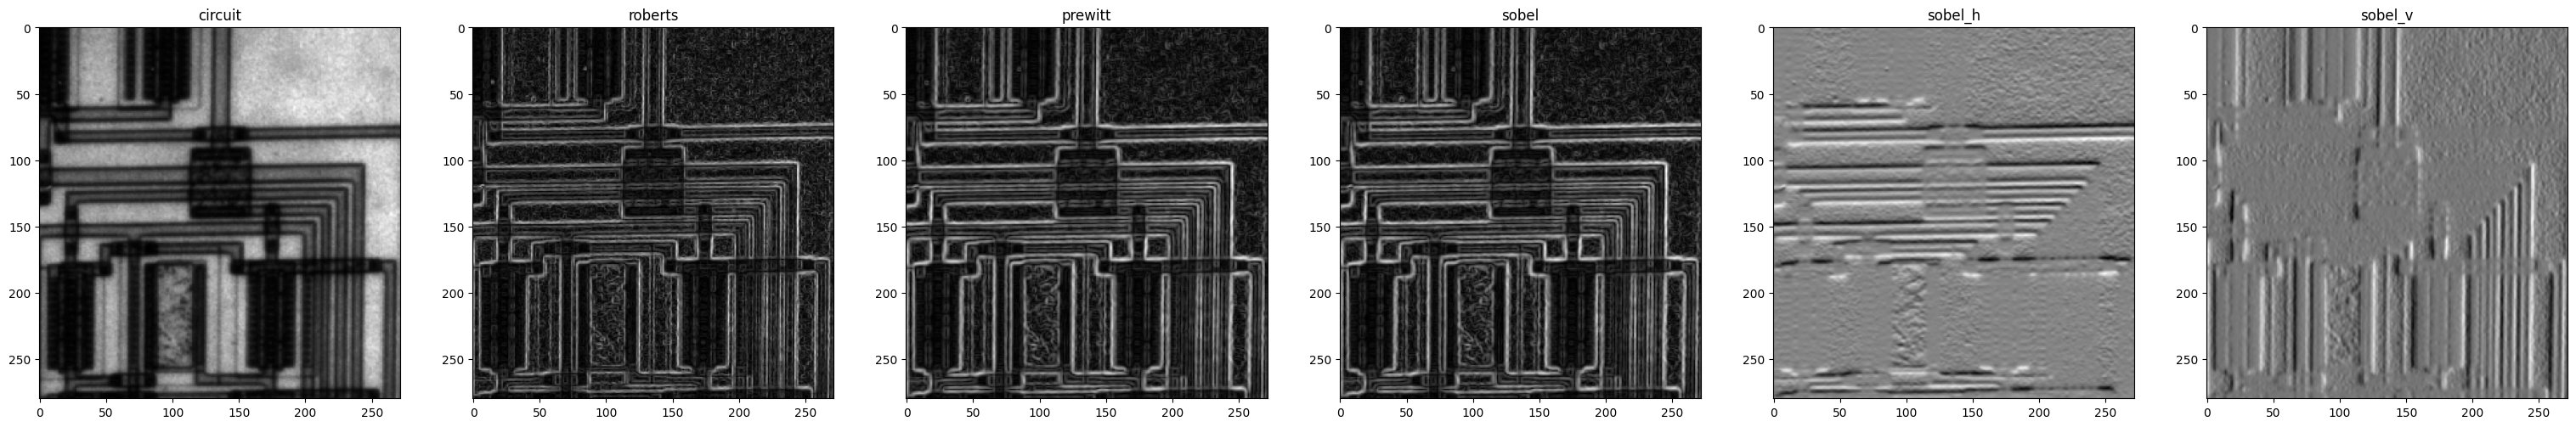

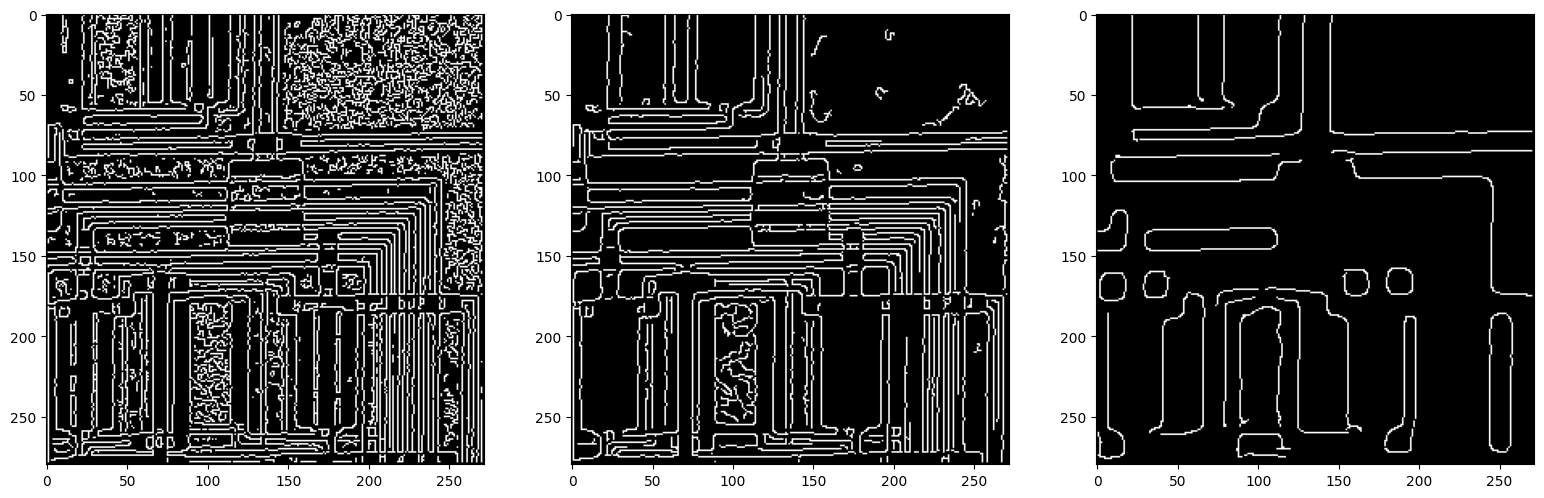

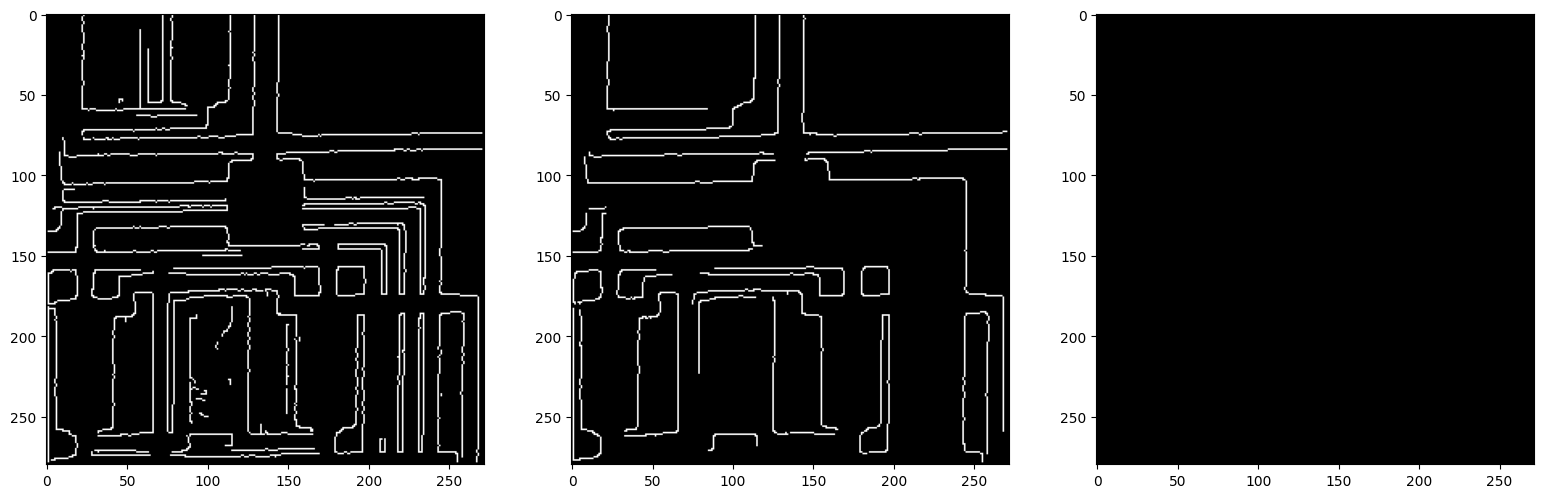

In [2]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = io.imread('circuit.tif', as_gray=True)


show_images(
    [img, roberts(img), prewitt(img), sobel(img), sobel_h(img), sobel_v(img)],
    ["circuit", "roberts", "prewitt", "sobel", "sobel_h", "sobel_v"]
)


show_images([canny(img, 0.2), canny(img, 1), canny(img, 3)], ["", "", ""])
lt, ht = (100, 150)
show_images([canny(img, 0.2, lt, ht), canny(img, 1, lt, ht), canny(img, 3, lt, ht)], ["", "", ""])


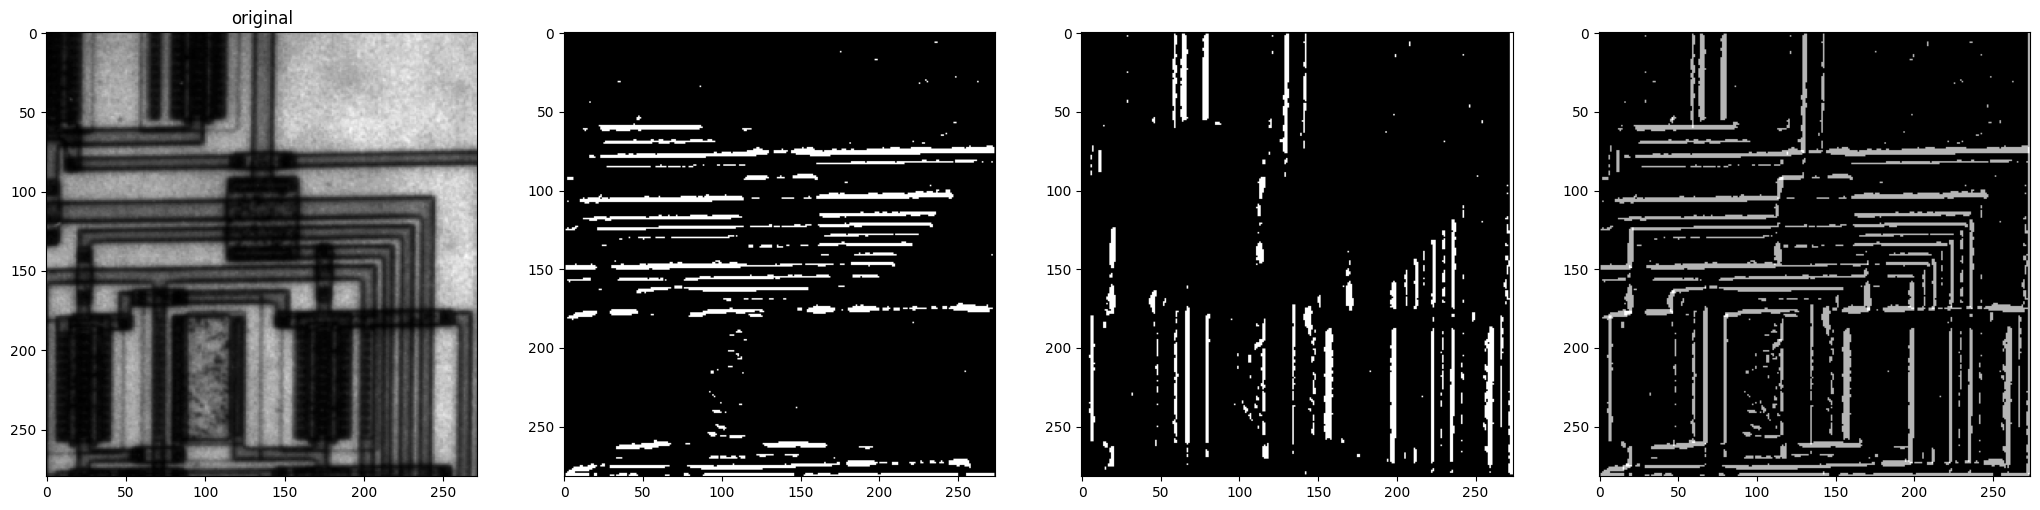

In [3]:
# 2. Custom Sobel (V-H-Both)

hy = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

hx = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]) 

threshold = 80

img = io.imread('circuit.tif', as_gray=True)

img_vertical = convolve2d(img, hy)
img_vertical = img_vertical
img_vertical[img_vertical >= threshold] = 255
img_vertical[img_vertical < threshold] = 0


img_horizontal = convolve2d(img, hx)
img_horizontal = img_horizontal
img_horizontal[img_horizontal >= threshold] = 255
img_horizontal[img_horizontal < threshold] = 0

img_final = np.sqrt(np.power(img_horizontal, 2) + np.power(img_vertical, 2))

show_images([img, img_horizontal, img_vertical, img_final], ["original", "", "", ""])





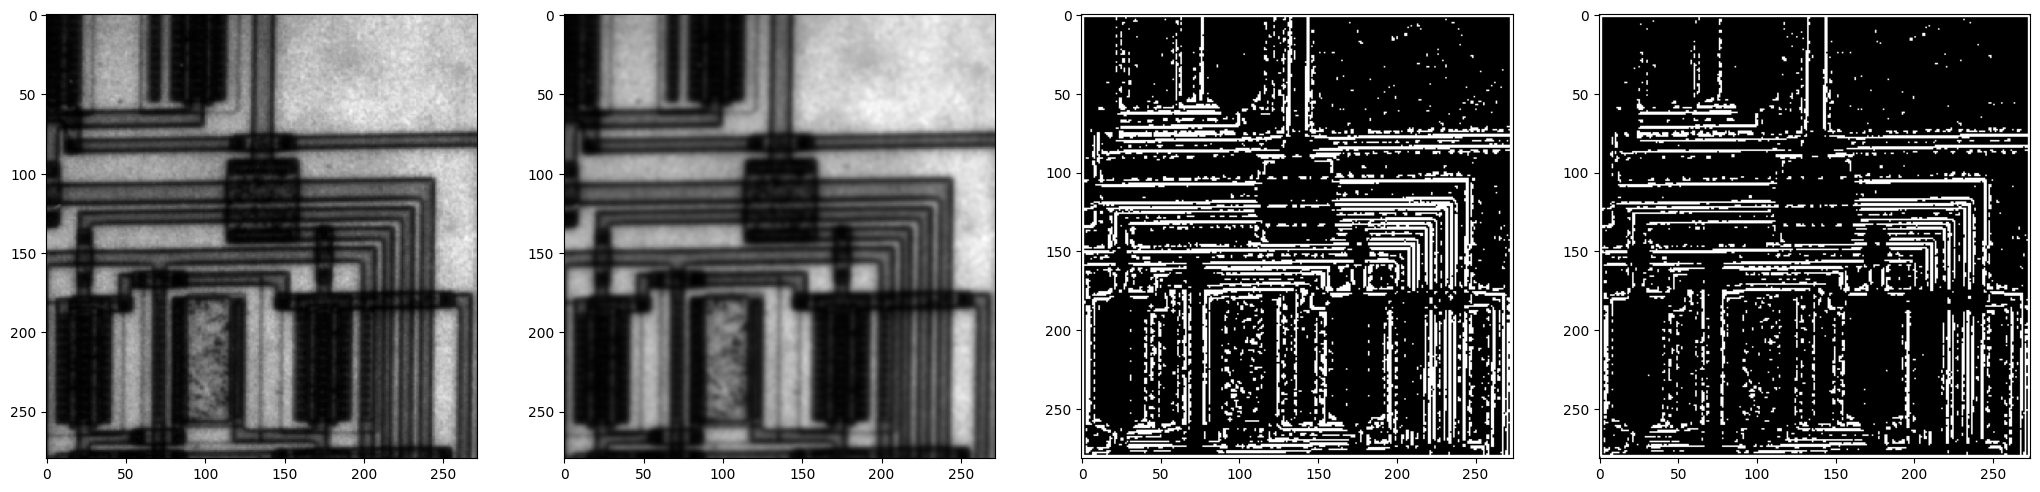

In [4]:
# 3. Custom LoG
from skimage.filters import gaussian

thres= 20/255
thres2 = 8/255

img = io.imread('circuit.tif', as_gray=True)
img = np.array(img)
img_gauss = gaussian(img, 1)

F1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

F2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img_F1 = abs(convolve2d(img_gauss, F1))
img_F1[img_F1 < thres] = 0
img_F1[img_F1 >= thres] = 1

img_F2 = abs(convolve2d(img_gauss, F2))
img_F2[img_F2 < thres2] = 0
img_F2[img_F2 >= thres2] = 1



show_images([img, img_gauss, img_F1, img_F2], ["", "", "", ""])



In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''